In [1]:
# imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
#from sklearn import cross_validation

In [2]:
import sqlite3
con = sqlite3.connect("final.sqlite")

In [3]:
cleaned_data = pd.read_sql_query("select * from Reviews", con)

In [4]:
cleaned_data.shape

(364171, 12)

In [5]:
cleaned_data.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...


In [6]:
cleaned_data["Score"].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [7]:
# To randomly sample 5k points from both class

data_pos = cleaned_data[cleaned_data["Score"] == "positive"].sample(n = 5000)
data_neg = cleaned_data[cleaned_data["Score"] == "negative"].sample(n = 5000)
final_10k = pd.concat([data_pos, data_neg])
final_10k.shape

(10000, 12)

In [8]:
# Sort data based on time
final_10k["Time"] = pd.to_datetime(final_10k["Time"], unit = "s")
final_10k = final_10k.sort_values(by = "Time")
final_10k.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
342,346037,374339,B00004CI84,AZRJH4JFB59VC,Lynwood E. Hines,21,23,negative,2001-08-08,"Great movie, terrible DVD",I am continually amazed at the shoddy treatmen...,b'continu amaz shoddi treatment movi get dvd r...
365,346040,374342,B00004CI84,A10L8O1ZMUIMR2,G. Kleinschmidt,61,79,negative,2002-12-27,Great movie turned bad,"Just to let you know, this movie is one of my ...",b'let know movi one person favorit ghost movi ...
357315,420194,454404,B007JXVR76,A1ZXF1MOZZYAJC,"""boycat""",0,6,positive,2003-07-16,Meow Mix is the best cat food in the WORLD!,"I love meow mix, my cats love it to. We all ea...",b'love meow mix cat love eat togther cat kittl...
5140,179643,194858,B0000E65WB,A2VZ11U5DXM8J5,"C. Ebeling ""ctlpareader""",1,1,positive,2003-11-09,Stock Up On This Item,I usually purchase this item in smaller links ...,b'usual purchas item smaller link pound stash ...
5365,94024,102216,B0000GH6UG,A1J2NULS2YDNAQ,Matt Cromwell,8,12,positive,2004-01-10,Chocolate Like You've Never Had It!,I was first turned onto this chocolate when I ...,b'first turn onto chocol visit privat mexican ...


In [9]:
# Fuction to compute alpha value(bag of words)
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha

In [10]:
# 10k data which will use to train model after vectorization
X = final_10k["CleanedText"]
print("shape of X:", X.shape)

shape of X: (10000,)


In [11]:
# class label
y = final_10k["Score"]
print("shape of y:", y.shape)

shape of y: (10000,)


In [12]:
# split data into train and test where 70% data used to train model and 30% for test

from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(7000,) (7000,) (3000,)


In [13]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_train

<7000x12141 sparse matrix of type '<class 'numpy.int64'>'
	with 228331 stored elements in Compressed Sparse Row format>

In [14]:
# Test Vectorizor
x_test = bow.transform(x_test)

In [15]:
x_test.shape

(3000, 12141)


The optimal number of alpha is 9.


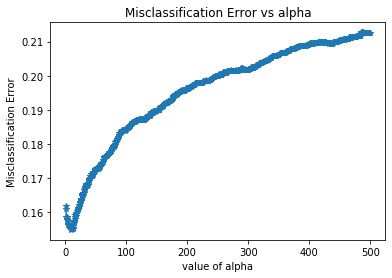

9.5

In [16]:
# To choose optimal_alpha using cross validation

optimal_alpha_bow = naive_bayes(X_train, y_train)
optimal_alpha_bow

In [17]:
# instantiate learning model alpha = optimal_alpha
nb_optimal =  MultinomialNB(alpha = optimal_alpha_bow)

# fitting the model
nb_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = nb_optimal.predict(x_test)

In [18]:
# To get all the features name 

bow_features = bow.get_feature_names()

In [19]:
# To count feature for each class while fitting the model
# Number of samples encountered for each (class, feature) during fitting

feat_count = nb_optimal.feature_count_
feat_count.shape

(2, 12141)

In [20]:
# Number of samples encountered for each class during fitting

nb_optimal.class_count_

array([3505., 3495.])

In [21]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb_optimal.feature_log_prob_
log_prob

array([[-10.22540132, -10.22540132, -10.12531786, ..., -10.22540132,
        -10.12531786, -10.03434608],
       [-10.07588102, -10.07588102, -10.17596448, ...,  -9.82456659,
         -9.98490924, -10.17596448]])

In [22]:
feature_prob = pd.DataFrame(log_prob, columns = bow_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(12141, 2)

In [23]:
# To show top 10 feature from both class
# Feature Importance
print("Top 10 Negative Features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 Positive Features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])

Top 10 Negative Features:-
 tast      -4.786636
like      -4.853296
product   -5.009608
flavor    -5.318568
one       -5.320127
would     -5.419226
tri       -5.487819
coffe     -5.598882
good      -5.614458
use       -5.621811
Name: 0, dtype: float64


 Top 10 Positive Features:-
 like      -5.049810
tast      -5.122404
good      -5.193440
love      -5.319421
great     -5.335098
flavor    -5.338430
use       -5.343449
one       -5.415592
tri       -5.471187
product   -5.487518
Name: 1, dtype: float64


In [24]:
# Accuracy on train data
train_acc_bow = nb_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.8891428571428571


In [25]:
# Error on train data
train_err_bow = 1-train_acc_bow
print("Train Error %f%%" % (train_err_bow))

Train Error 0.110857%


In [26]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the naive bayes classifier for alpha = %d is %f%%' % (optimal_alpha_bow, acc_bow))


The accuracy of the naive bayes classifier for alpha = 9 is 84.866667%


In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1304,  191],
       [ 263, 1242]], dtype=int64)

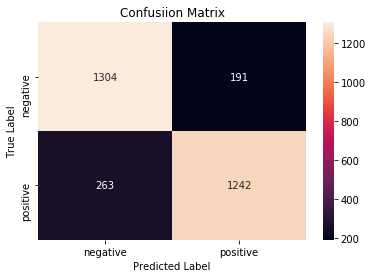

In [28]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1495
    positive       0.87      0.83      0.85      1505

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [30]:
#tf-idf
# data
X = final_10k["CleanedText"]

In [32]:
# Target/class-label
y = final_10k["Score"]

In [33]:
# Split data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000,) (3000,) (7000,) (3000,)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer()
#tfidf_data = tfidf.fit_transform(final_4000["CleanedText"])
#tfidf_data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

<7000x188676 sparse matrix of type '<class 'numpy.float64'>'
	with 495711 stored elements in Compressed Sparse Row format>

In [35]:
# Convert test text data to its vectorizor
x_test = tf_idf_vect.transform(x_test)
x_test.shape

(3000, 188676)


The optimal number of alpha is 2.


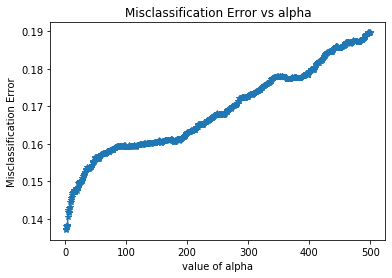

2.0

In [36]:
# To choosing optimal_alpha

optimal_alpha_tfidf = naive_bayes(X_train, y_train)
optimal_alpha_tfidf

In [37]:
# instantiate learning model alpha = optimal_alpha
nb_optimal = MultinomialNB(alpha = optimal_alpha_tfidf)

# fitting the model
nb_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)
    
# predict the response
pred = nb_optimal.predict(x_test)

In [38]:
#to get all the features name
tfidf_features = tf_idf_vect.get_feature_names()

In [39]:
# To count feature for each class while fitting the model
# Number of samples encountered for each (class, feature) during fitting

feat_count = nb_optimal.feature_count_
feat_count.shape

(2, 188676)

In [40]:
# Number of samples encountered for each class during fitting

nb_optimal.class_count_

array([3505., 3495.])

In [41]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb_optimal.feature_log_prob_
log_prob

array([[-12.21469605, -12.21469605, -12.21469605, ..., -12.03278372,
        -12.08710871, -12.14455034],
       [-12.17682904, -12.17682904, -12.17577855, ..., -12.21204206,
        -12.21204206, -12.21204206]])

In [42]:
feature_prob = pd.DataFrame(log_prob, columns = tfidf_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(188676, 2)

In [43]:
# To show top 10 feature from both class
print("Top 10 negative features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 positive features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])

Top 10 negative features:-
 tast      -8.608419
like      -8.718221
product   -8.751844
flavor    -8.997285
coffe     -9.043339
one       -9.063725
would     -9.072867
tri       -9.214175
order     -9.225174
buy       -9.266338
Name: 0, dtype: float64


 Top 10 positive features:-
 great     -8.734468
love      -8.773758
good      -8.844670
tast      -8.940815
like      -8.951813
coffe     -8.960757
flavor    -9.032769
use       -9.036290
tea       -9.050359
product   -9.139048
Name: 1, dtype: float64


In [44]:
# Accuracy on train data
train_acc_tfidf = nb_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_tfidf)

Train accuracy 0.9821428571428571


In [45]:
# Error on train data
train_err_tfidf = 1-train_acc_tfidf
print("Train Error %f%%" % (train_err_tfidf))

Train Error 0.017857%


In [46]:
# evaluate accuracy
acc_tfidf = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the naive bayes classifier for alpha = %d is %f%%' % (optimal_alpha_tfidf, acc_tfidf))


The accuracy of the naive bayes classifier for alpha = 2 is 86.533333%


In [47]:
#from sklearn.matrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1310,  185],
       [ 219, 1286]], dtype=int64)

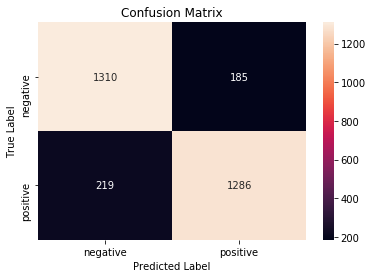

In [48]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1495
    positive       0.87      0.85      0.86      1505

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [50]:
# model performence table
models = pd.DataFrame({'Model': ['Naive Bayes with Bow', "Naive Bayes with TFIDF"], 'Hyper Parameter(alpha)': [optimal_alpha_bow, optimal_alpha_tfidf], 'Train Error': [train_err_bow, train_err_tfidf], 'Test Error': [100-acc_bow, 100-acc_tfidf], 'Accuracy': [acc_bow, acc_tfidf]}, columns = ["Model", "Hyper Parameter(alpha)", "Train Error", "Test Error", "Accuracy"])
models.sort_values(by='Accuracy', ascending=False)

,Model,Hyper Parameter(alpha),Train Error,Test Error,Accuracy
1,Naive Bayes with TFIDF,2.0,0.017857,13.466667,86.533333
0,Naive Bayes with Bow,9.5,0.110857,15.133333,84.866667
